In [0]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers import Conv2D , MaxPooling2D ,Conv2DTranspose
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
import keras.backend as K
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import keras.initializers as ini
import keras.applications.vgg19 as vgg
import tensorflow as tf
from keras.models import load_model

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
gen = ImageDataGenerator(preprocessing_function=lambda x : x/255.0 , validation_split = 0.3)
train=gen.flow_from_directory(directory = "/gdrive/My Drive/scoly_224",batch_size=100,target_size=(224,224),color_mode='rgb',class_mode='categorical' , shuffle = True, subset="training")
valid=gen.flow_from_directory(directory = "/gdrive/My Drive/scoly_224",batch_size=100,target_size=(224,224),color_mode='rgb',class_mode='categorical' , shuffle = True, subset="validation")


Found 4685 images belonging to 8 classes.
Found 2005 images belonging to 8 classes.


In [0]:
 i = 0
 x_test = np.empty([1,224,224,3],  dtype='uint8')
 for filename_x in sorted (glob.glob('/gdrive/My Drive/scoly_244/*')): #assuming gif
        im=Image.open(filename_x)
        im1 = im.resize((224,224))
        im1 = np.array(im1.getdata() ,  dtype='uint8').reshape((224,224,3))
        im1 = np.expand_dims(im1,axis=0)
        if i == 0 :
          x_test = im1
          i = 1
        else :
          x_test = np.append(x_test,im1,axis=0)

In [0]:
x_test,y = next(train)

In [0]:
print (x_test[0])

[[[0.32156864 0.24313726 0.20784314]
  [0.30588236 0.23529412 0.19607843]
  [0.28627452 0.21568628 0.16862746]
  ...
  [0.07450981 0.07843138 0.00784314]
  [0.13333334 0.12941177 0.05882353]
  [0.23137255 0.22745098 0.15686275]]

 [[0.29411766 0.21568628 0.18039216]
  [0.29803923 0.22745098 0.1882353 ]
  [0.30588236 0.23529412 0.19607843]
  ...
  [0.08235294 0.08627451 0.01568628]
  [0.16078432 0.15686275 0.08627451]
  [0.2627451  0.25490198 0.19607843]]

 [[0.2784314  0.20784314 0.16862746]
  [0.2901961  0.21960784 0.18039216]
  [0.30588236 0.23529412 0.19607843]
  ...
  [0.10196079 0.10588235 0.03529412]
  [0.20392157 0.19607843 0.13725491]
  [0.30980393 0.3019608  0.24313726]]

 ...

 [[0.5764706  0.6509804  0.57254905]
  [0.4509804  0.5254902  0.44705883]
  [0.5529412  0.627451   0.5411765 ]
  ...
  [0.30980393 0.32941177 0.21176471]
  [0.29803923 0.31764707 0.2       ]
  [0.13725491 0.16470589 0.04313726]]

 [[0.50980395 0.59607846 0.5137255 ]
  [0.4627451  0.54901963 0.45882353]


Imagen reconstruida:


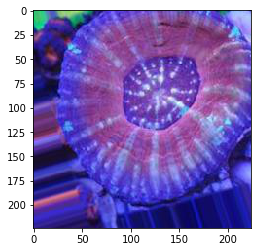

In [0]:
print("Imagen reconstruida:")
plt.imshow(x_test[1])
plt.show()


In [0]:
#x,y = next(valid)
print (y[1])

[0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
valid.filenames[1700:2000]

['ufo/310_0_5333.jpg',
 'ufo/311_0_1717.jpg',
 'ufo/312_0_7676.jpg',
 'ufo/313_0_5580.jpg',
 'ufo/314_0_1995.jpg',
 'ufo/315_0_159.jpg',
 'ufo/316_0_3209.jpg',
 'ufo/317_0_4283.jpg',
 'ufo/318_0_6774.jpg',
 'ufo/319_0_8630.jpg',
 'ufo/31_0_1969.jpg',
 'ufo/320_0_7466.jpg',
 'ufo/321_0_1118.jpg',
 'ufo/322_0_4060.jpg',
 'ufo/323_0_4063.jpg',
 'ufo/324_0_7468.jpg',
 'ufo/325_0_1995.jpg',
 'ufo/326_0_2070.jpg',
 'ufo/327_0_2348.jpg',
 'ufo/328_0_7231.jpg',
 'ufo/329_0_5772.jpg',
 'ufo/32_0_9559.jpg',
 'ufo/330_0_5613.jpg',
 'ufo/331_0_4168.jpg',
 'ufo/332_0_8405.jpg',
 'ufo/333_0_5807.jpg',
 'ufo/334_0_4946.jpg',
 'warpaint/0_0_3327.jpg',
 'warpaint/100_0_7134.jpg',
 'warpaint/101_0_721.jpg',
 'warpaint/102_0_4934.jpg',
 'warpaint/103_0_3297.jpg',
 'warpaint/104_0_1160.jpg',
 'warpaint/105_0_4551.jpg',
 'warpaint/106_0_7053.jpg',
 'warpaint/107_0_3877.jpg',
 'warpaint/108_0_1583.jpg',
 'warpaint/109_0_2812.jpg',
 'warpaint/10_0_1386.jpg',
 'warpaint/110_0_866.jpg',
 'warpaint/111_0_3304.j

In [0]:
model = Sequential()
model.add(Conv2D(8,3,input_shape = (224,224,3),padding='same' , activation='relu' ,kernel_initializer =ini.RandomNormal(mean=0.0, stddev=0.004, seed=None)))
model.add(MaxPooling2D())
model.add(Conv2D(16,3,activation='relu',padding='same', kernel_initializer =ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))
model.add(MaxPooling2D())
model.add(Conv2D(32,3,activation='relu', padding='same',kernel_initializer =ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,activation='relu', padding='same',kernel_initializer =ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))
model.add(MaxPooling2D())
model.add(Conv2D(128,3,activation='relu', padding='same',kernel_initializer =ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))
model.add(MaxPooling2D())
model.add(Conv2D(256,3,activation='relu', padding='same',kernel_initializer =ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(8,activation='sigmoid' , kernel_initializer = ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))

W0827 20:48:26.545305 140363342329728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 20:48:26.586188 140363342329728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 20:48:26.593258 140363342329728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0827 20:48:26.619369 140363342329728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
mode = load_model('/gdrive/My Drive/scoly/coral_model_224_1.hdf5')

W0903 08:25:11.861830 139683564963712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 08:25:11.928065 139683564963712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 08:25:11.972999 139683564963712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0903 08:25:14.469908 139683564963712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0903 08:25:14.471179 139683564963712 deprecation_

In [0]:
vgg_weights = mode.layers[0].get_weights()
dense_weights = mode.layers[1].get_weights()

In [0]:
model1 = vgg.VGG19(weights=None,input_shape=(224,224,3),classes=8 , include_top=False, pooling = 'avg' )
model = Sequential()
model.add(model1)
model.add(Dense(8,activation='softmax' , kernel_initializer = ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))

W0904 09:35:59.283262 140135848163200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 09:35:59.328266 140135848163200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 09:35:59.336476 140135848163200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 09:35:59.385406 140135848163200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0904 09:35:59.735871 140135848163200 deprecation_wrapp

In [0]:
model1 = vgg.VGG16(weights=None,input_shape=(224,224,3),classes=8 , include_top=False, pooling = 'avg' )
model1.set_weights(vgg_weights)
model = Sequential()
model.add(model1)
#model.add(Dense(8,activation='softmax' , kernel_initializer = ini.RandomNormal(mean=0.0, stddev=0.0004, seed=None)))
l = Dense(8,activation='softmax')
model.add(l)
l.set_weights(dense_weights)

In [0]:
model.compile(loss='categorical_crossentropy' , optimizer=optimizers.Adam(lr=0.000005) , metrics=['accuracy'] )


W0904 09:36:09.893730 140135848163200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 09:36:09.904106 140135848163200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
checkpointer = ModelCheckpoint(filepath='/gdrive/My Drive/scoly/coral_model_vgg19.hdf5',  mode = 'min', verbose=1, save_best_only=True)
#model.compile(loss='categorical_crossentropy' , optimizer=optimizers.Adam(lr=0.000005) , metrics=['accuracy'] )
model.fit_generator(train,steps_per_epoch=47 ,epochs= 50 , verbose = 2, validation_data = valid, callbacks=[checkpointer]  ,validation_steps = 21 )

W0904 09:36:30.081024 140135848163200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('./coral_model1.hdf5')
tflite_model = converter.convert()
open("./coral_model1.tflite", "wb").write(tflite_model)

W0903 22:42:07.221585 140235052332928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/lite/python/util.py:238: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0903 22:42:07.223128 140235052332928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


58881568